In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mouse_count=study_complete["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
rows = study_complete.loc[study_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mouse_id = rows["Mouse ID"].iloc[0]
dup_mouse_id


'g989'

In [5]:
# Get all the data for the duplicate mouse ID.
dup_mouse_data=study_complete.query('`Mouse ID`=="'+dup_mouse_id+'"')
dup_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_complete_clean=study_complete.query('`Mouse ID`!="'+dup_mouse_id+'"')
study_complete_clean


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean=study_complete_clean["Mouse ID"].nunique()
mouse_count_clean

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume=study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean_tumor_volume.name="Mean Tumor Volume"
median_tumor_volume=study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median_tumor_volume.name="Median Tumor Volume"
var_tumor_volume=study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
var_tumor_volume.name="Tumor Volume Variance"
std_tumor_volume=study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_tumor_volume.name="Tumor Volume Std. Dev."
sem_tumor_volume=study_complete_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sem_tumor_volume.name="Tumor Volume Std. Err."

drug_regimen_stats=pd.merge(mean_tumor_volume,median_tumor_volume,on="Drug Regimen")
drug_regimen_stats=pd.merge(drug_regimen_stats,var_tumor_volume,on="Drug Regimen")
drug_regimen_stats=pd.merge(drug_regimen_stats,std_tumor_volume,on="Drug Regimen")
drug_regimen_stats=pd.merge(drug_regimen_stats,sem_tumor_volume,on="Drug Regimen")

drug_regimen_stats
                           

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
drug_regimen_stats_2=study_complete_clean.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_regimen_stats_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, '# of Observed Mouse Timepoints')

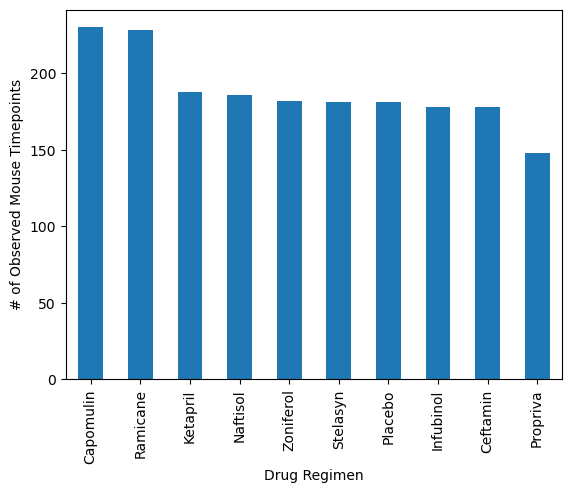

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = study_complete_clean['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

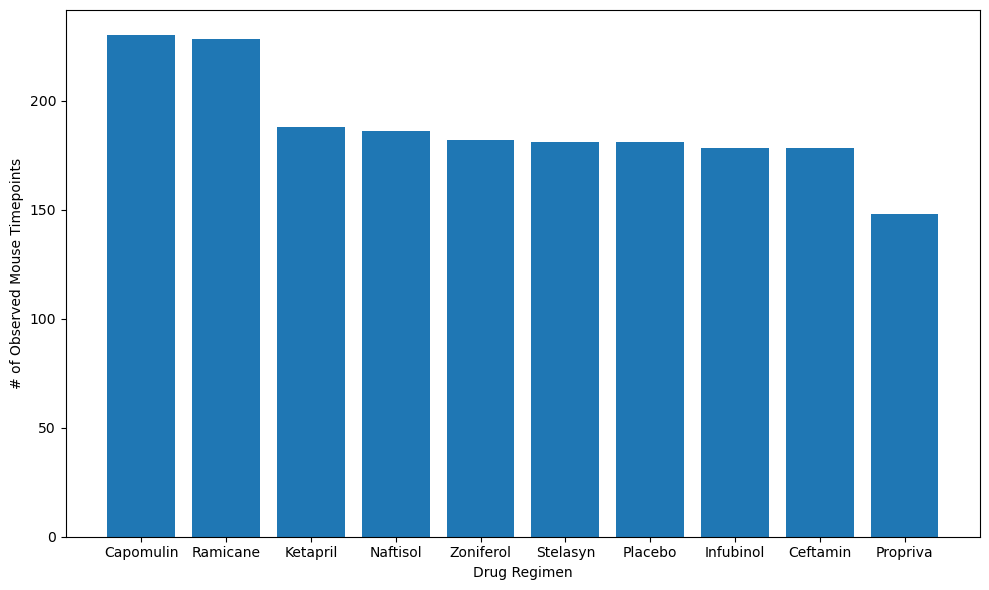

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = study_complete_clean['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

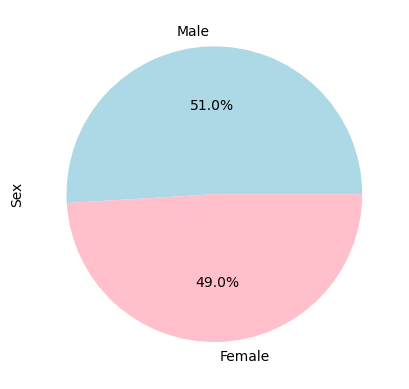

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = study_complete_clean['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ADD8E6','pink'], labels=['Male','Female'], ylabel='Sex')
plt.show()



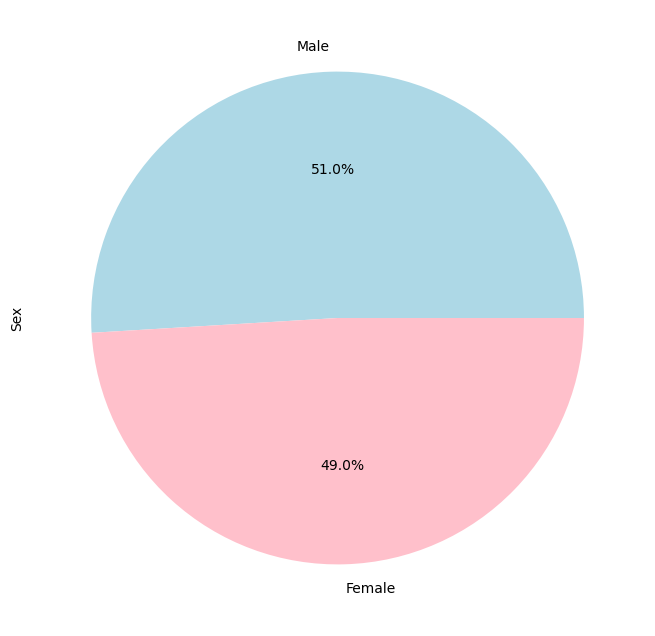

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = study_complete_clean['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=['Male', 'Female'], colors=['#ADD8E6', 'pink'], autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = study_complete_clean[study_complete_clean['Drug Regimen'].isin(selected_regimens)]
final_tumor_volumes = filtered_df.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last().reset_index()
final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
last_timepoints

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [21]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, study_complete_clean, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [22]:
# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in selected_regimens:
    # Filter the dataframe for the current treatment
    treatment_df = merged_df[merged_df['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    
    # Append tumor volume data for plotting
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Print potential outliers
    print(f"{treatment}'s potential outliers: {potential_outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


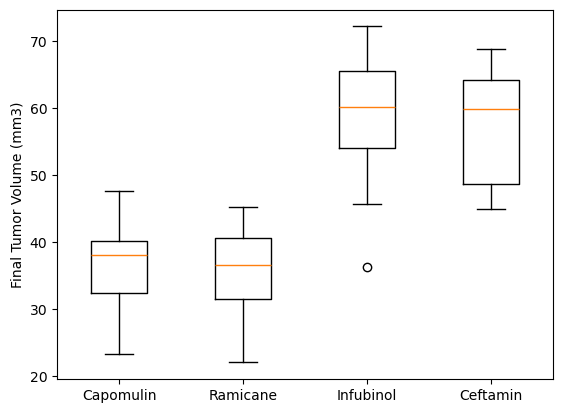

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume_data)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticks([1, 2, 3, 4])
_ = ax1.set_xticklabels(selected_regimens)


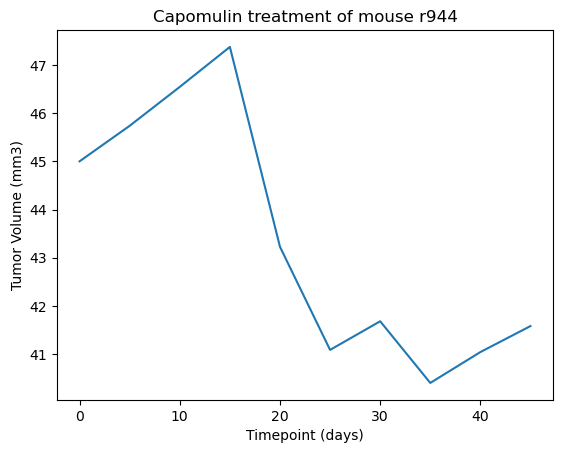

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the dataframe for random mouse treated with Capomulin
capomulin_data = study_complete_clean[study_complete_clean['Drug Regimen'] == 'Capomulin']
# Select a random mouse ID
random_mouse_id = np.random.choice(capomulin_data['Mouse ID'].unique())
random_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == random_mouse_id]

# Create a line plot of tumor volume vs. timepoint
plt.plot(random_mouse_data['Timepoint'], random_mouse_data['Tumor Volume (mm3)'])

# Set plot labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {random_mouse_id}')

plt.show()




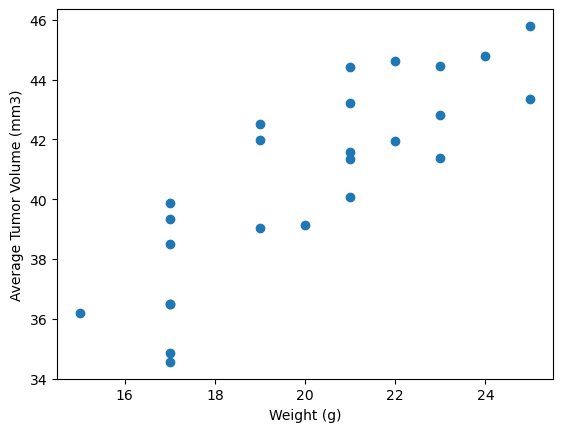

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = study_complete_clean[study_complete_clean['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Group the data by Mouse ID and get the unique weights for each mouse
grouped_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Create an empty dictionary to hold the first weight for each mouse
mouse_weight_dict = {}

# Iterate over the grouped data and extract the first weight for each mouse
for mouse_id, weights in grouped_weights.items():
    if len(weights) > 0:
        mouse_weight_dict[mouse_id] = weights[0]

# Convert the dictionary to a pandas Series
mouse_weight = pd.Series(mouse_weight_dict)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Set plot labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


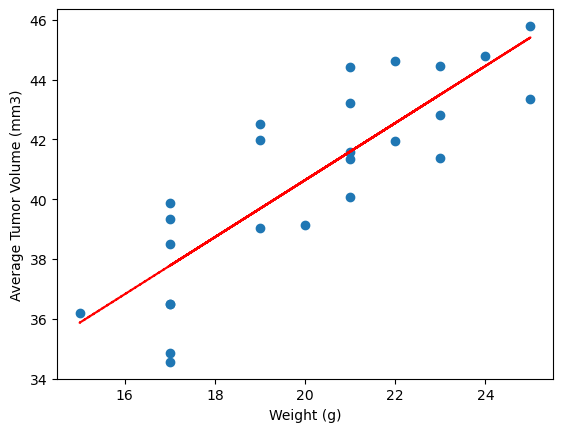

In [ ]:
# Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_data = study_complete_clean[study_complete_clean['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Group the data by Mouse ID and get the unique weights for each mouse
grouped_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Create an empty dictionary to hold the first weight for each mouse
mouse_weight_dict = {}

# Iterate over the grouped data and extract the first weight for each mouse
for mouse_id, weights in grouped_weights.items():
    if len(weights) > 0:
        mouse_weight_dict[mouse_id] = weights[0]

# Convert the dictionary to a pandas Series
mouse_weight = pd.Series(mouse_weight_dict)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, average_tumor_volume)

# Calculate the correlation coefficient
correlation_coefficient = round(rvalue, 2)

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, marker='o')

# Plot the linear regression line
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add correlation coefficient to the plot
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient}')

# Show plot
plt.show()